In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bmw_pricing_challenge.csv')
df

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2/1/2012,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,1/1/2018
1,BMW,M4,13929,317,4/1/2016,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2/1/2018
2,BMW,320,183297,120,4/1/2012,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2/1/2018
3,BMW,420,128035,135,7/1/2014,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2/1/2018
4,BMW,425,97097,160,12/1/2014,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,4/1/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743,110,10/1/2015,diesel,black,van,False,True,False,False,False,False,True,False,14600,8/1/2018
4839,BMW,218 Active Tourer,49832,100,6/1/2015,diesel,grey,van,False,True,False,False,False,False,True,True,17500,8/1/2018
4840,BMW,218 Gran Tourer,19633,110,10/1/2015,diesel,grey,van,False,True,False,False,False,False,True,True,17000,9/1/2018
4841,BMW,218 Active Tourer,27920,110,4/1/2016,diesel,brown,van,True,True,False,False,False,False,True,True,22700,9/1/2018


In [6]:
df_final = df.drop(['maker_key', 'model_key', 'engine_power', 'fuel', 'paint_color', 'car_type', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8'], axis='columns')
df_final

,mileage,registration_date,price,sold_at
0,140411,2/1/2012,11300,1/1/2018
1,13929,4/1/2016,69700,2/1/2018
2,183297,4/1/2012,10200,2/1/2018
3,128035,7/1/2014,25100,2/1/2018
4,97097,12/1/2014,33400,4/1/2018
...,...,...,...,...
4838,39743,10/1/2015,14600,8/1/2018
4839,49832,6/1/2015,17500,8/1/2018
4840,19633,10/1/2015,17000,9/1/2018
4841,27920,4/1/2016,22700,9/1/2018


In [8]:
df_final['registration_date']= pd.to_datetime(df_final['registration_date'], format = '%d/%m/%Y')
df_final['sold_at']= pd.to_datetime(df_final['sold_at'], format = '%d/%m/%Y')
df_final['age'] = (df_final['sold_at'] - df_final['registration_date']).dt.days/365
df_final

,mileage,registration_date,price,sold_at,age
0,140411,2012-01-02,11300,2018-01-01,6.002740
1,13929,2016-01-04,69700,2018-01-02,1.997260
2,183297,2012-01-04,10200,2018-01-02,6.000000
3,128035,2014-01-07,25100,2018-01-02,3.989041
4,97097,2014-01-12,33400,2018-01-04,3.980822
...,...,...,...,...,...
4838,39743,2015-01-10,14600,2018-01-08,2.997260
4839,49832,2015-01-06,17500,2018-01-08,3.008219
4840,19633,2015-01-10,17000,2018-01-09,3.000000
4841,27920,2016-01-04,22700,2018-01-09,2.016438


In [9]:
df_final['age'] = df_final['age'].round()
df_final

,mileage,registration_date,price,sold_at,age
0,140411,2012-01-02,11300,2018-01-01,6.0
1,13929,2016-01-04,69700,2018-01-02,2.0
2,183297,2012-01-04,10200,2018-01-02,6.0
3,128035,2014-01-07,25100,2018-01-02,4.0
4,97097,2014-01-12,33400,2018-01-04,4.0
...,...,...,...,...,...
4838,39743,2015-01-10,14600,2018-01-08,3.0
4839,49832,2015-01-06,17500,2018-01-08,3.0
4840,19633,2015-01-10,17000,2018-01-09,3.0
4841,27920,2016-01-04,22700,2018-01-09,2.0


In [11]:
df_final = df_final.drop(['registration_date','sold_at'], axis='columns')
df_final

,mileage,price,age
0,140411,11300,6.0
1,13929,69700,2.0
2,183297,10200,6.0
3,128035,25100,4.0
4,97097,33400,4.0
...,...,...,...
4838,39743,14600,3.0
4839,49832,17500,3.0
4840,19633,17000,3.0
4841,27920,22700,2.0


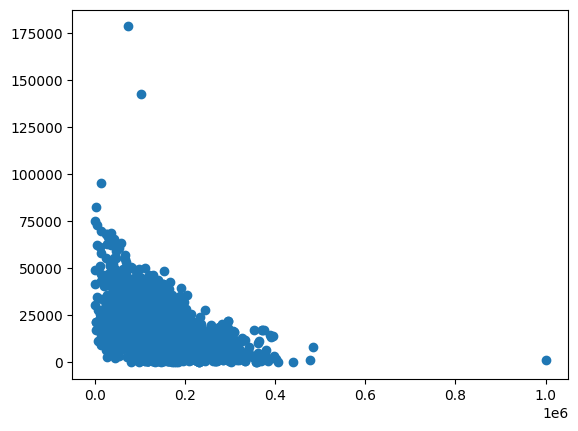

In [14]:
%matplotlib inline
plt.scatter(df_final['mileage'], df_final['price'])

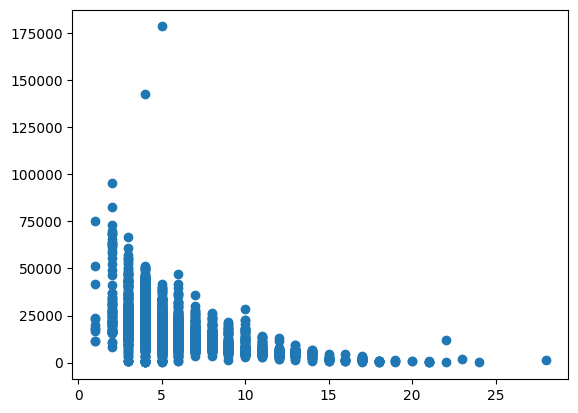

In [15]:
%matplotlib inline
plt.scatter(df_final['age'], df_final['price'])

In [16]:
x= df_final[['mileage', 'age']]
y = df['price']

In [17]:
x

,mileage,age
0,140411,6.0
1,13929,2.0
2,183297,6.0
3,128035,4.0
4,97097,4.0
...,...,...
4838,39743,3.0
4839,49832,3.0
4840,19633,3.0
4841,27920,2.0


In [18]:
y

0       11300
1       69700
2       10200
3       25100
4       33400
        ...  
4838    14600
4839    17500
4840    17000
4841    22700
4842    15500
Name: price, Length: 4843, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15)

In [20]:
x_train

,mileage,age
879,134156,4.0
2351,181419,5.0
40,36696,4.0
4519,120816,5.0
91,147130,4.0
...,...,...
3217,161310,6.0
3629,162439,8.0
3379,70737,5.0
4322,114520,4.0


In [21]:
x_test

,mileage,age
1507,99605,4.0
4185,189429,4.0
3216,95241,5.0
411,160800,5.0
2844,103903,4.0
...,...,...
614,201626,5.0
804,300676,9.0
905,289547,10.0
597,106053,5.0


In [23]:
y_train.values

array([  100, 18000, 34300, ..., 16100, 35400, 15300], dtype=int64)

In [24]:
y_test

1507    14300
4185    13700
3216    11500
411     10100
2844    13600
        ...  
614     11700
804      7600
905      8100
597     13400
1806    12000
Name: price, Length: 727, dtype: int64

In [25]:
y_train

879       100
2351    18000
40      34300
4519    22700
91      23200
        ...  
3217    16400
3629     3600
3379    16100
4322    35400
1635    15300
Name: price, Length: 4116, dtype: int64

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()

In [28]:
reg.fit(x_train, y_train)

LinearRegression()

In [29]:
reg.predict(x_test)

array([19242.68465264, 15859.86148211, 18224.21243418, 15755.22303005,
       19080.81951652, 15932.45367933, 18114.11030779, 16971.58416696,
       14240.59305868, 14435.59660621, 15544.81341732, 15831.24233927,
       14793.33726595, 16024.64675825, 17041.38948189, 16630.53003185,
       23150.32527097, 22825.12623644, 16416.54266483, 14149.77314487,
       20243.94888141, 16757.53886335, 20150.86933332, 13878.82271779,
       20714.12084003, 19828.19355708, 19212.97046176, 10943.14640364,
       17750.53515095, 10753.93969264, 19868.82931368, 16061.85540285,
       18012.2963986 , 21523.72752918, 18313.63601537, 14072.62401851,
       12273.49159727,  2424.03252997, 17382.96797353, 19391.36858875,
       18510.93974923,  7681.257111  , 21278.95409073, 15942.45400678,
       18707.58586883, 21539.15097893, 14941.26509916, 20254.98053737,
       13817.9081892 , 10775.48153951, 12432.21062994, 20564.75901363,
       19572.28997403, 14824.55787968, 17628.62788115, 18034.08159345,
      

In [34]:
from sklearn.linear_model import LogisticRegression
reg2 = LogisticRegression(max_iter=10000)

In [35]:
reg2.fit(x_train, y_train)

C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [36]:
reg2.predict(x_test)

array([13100, 13100, 11900, 13100, 13100, 13100, 13100, 13100, 11900,
       13100, 13100, 11900, 11900, 13100, 11900, 13100,  4900, 11900,
       13100, 13100,  4900, 13100, 11900, 13100, 11900, 11900, 13100,
       13100, 13100, 13100, 11900, 13100, 11900, 13100, 13100, 13100,
        4900, 11900, 13100, 13100, 13100, 11900,  4900, 11900, 11900,
        4900, 13100, 13100, 13100, 13100,  4900, 11900, 13100, 11900,
       13100, 13100, 13100, 13100, 13100, 13100, 11900, 11900, 13100,
       13100, 13100, 13100, 11900,  4900, 11900, 11900, 13100, 13100,
       13100, 13100, 13100, 11900, 13100, 13100, 13100, 13100, 13100,
       13100,  4900, 11900, 13100, 13100, 13100,  4900, 13100, 11900,
       13100, 13100, 11900, 13100, 11900, 13100, 13100, 13100, 11900,
       13100,  4900, 12100,  4900, 13100, 13100, 11900, 13100, 13100,
       13100, 11900, 13100,  4900, 13100, 13100, 11900, 13100, 11900,
       13100, 13100, 13100, 11900, 11900, 11900, 13100, 13100, 13100,
       13100,  4900,